In [107]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [108]:
# Importing essential libaries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [109]:
# Reading the data 
cancer_data = pd.read_csv('Cancer_Data.csv')
cancer_data_backup = cancer_data.copy() # Cretaing a backup of the data to be safe.
cancer_data.sample(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
76,8610629,B,13.530,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.06556,...,12.49,91.36,605.5,0.1451,0.1379,0.08539,0.07407,0.2710,0.07191,NaN
236,88299702,M,23.210,26.97,153.50,1670.0,0.09509,0.16820,0.19500,0.12370,...,34.51,206.00,2944.0,0.1481,0.4126,0.58200,0.25930,0.3103,0.08677,NaN
359,901034301,B,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,...,25.02,75.79,439.6,0.1333,0.1049,0.11440,0.05052,0.2454,0.08136,NaN
507,91544002,B,11.060,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.04268,...,20.74,76.08,411.1,0.1662,0.2031,0.12560,0.09514,0.2780,0.11680,NaN
448,911150,B,14.530,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,...,28.39,108.10,830.5,0.1089,0.2649,0.37790,0.09594,0.2471,0.07463,NaN
202,878796,M,23.290,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,...,32.68,177.00,1986.0,0.1536,0.4167,0.78920,0.27330,0.3198,0.08762,NaN


In [110]:
# Checking the shape of the data and deleting duplicates from the data

print('The shape of the data is :',cancer_data.shape)


cancer_data = cancer_data.drop_duplicates()

print('The shape of the data is :',cancer_data.shape)

The shape of the data is : (569, 33)
The shape of the data is : (569, 33)


In [111]:
# Checking Data info and if there are any null values

cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [112]:
# Checking null Values

cancer_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [113]:
# Dropping column unnamed as there is 100% null value

cancer_data.drop('Unnamed: 32', axis=1, inplace = True)
cancer_data.drop('id', axis=1, inplace = True)

In [114]:
# Now checking data dimension
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

B    357
M    212
Name: diagnosis, dtype: int64

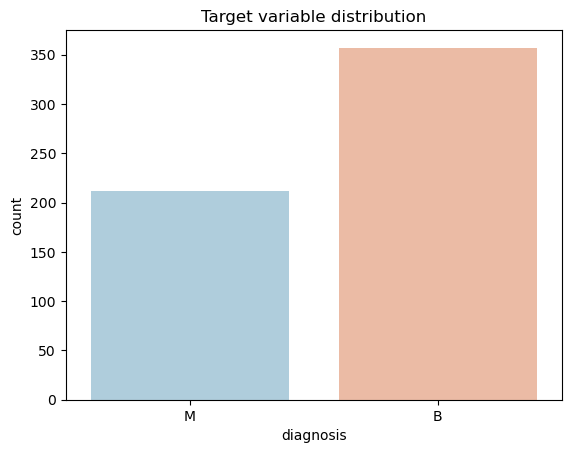

In [115]:
# Checking Target variable distribution

sns.countplot(cancer_data,x='diagnosis',palette='RdBu_r')
plt.title('Target variable distribution')

cancer_data['diagnosis'].value_counts()

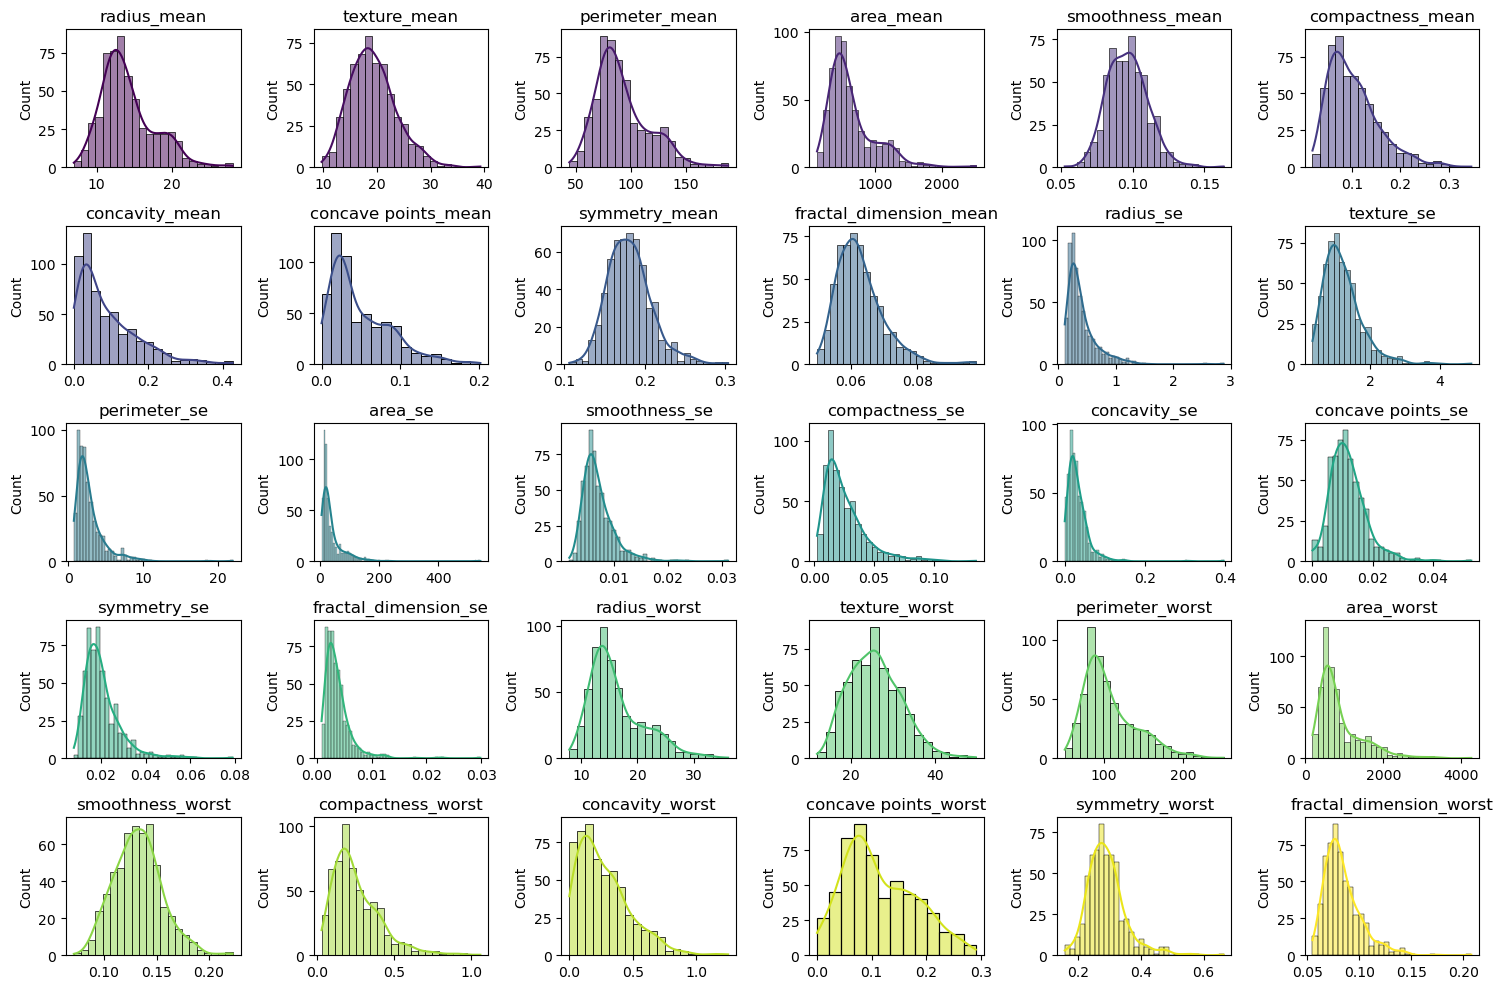

In [116]:
# Select numeric columns for visualization
numeric_columns = cancer_data.select_dtypes(include='number')

# Define a colormap
num_columns = len(numeric_columns.columns)
colors = plt.cm.viridis(np.linspace(0, 1, num_columns))

# Plot histograms for numeric columns
plt.figure(figsize=(15, 10))
for i, (column, color) in enumerate(zip(numeric_columns.columns, colors), 1):
    plt.subplot(5, 6, i)
    sns.histplot(cancer_data[column], kde=True, color=color)
    plt.title(column)
    plt.xlabel('')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Scatter chart explaining the concavity and radius mean')

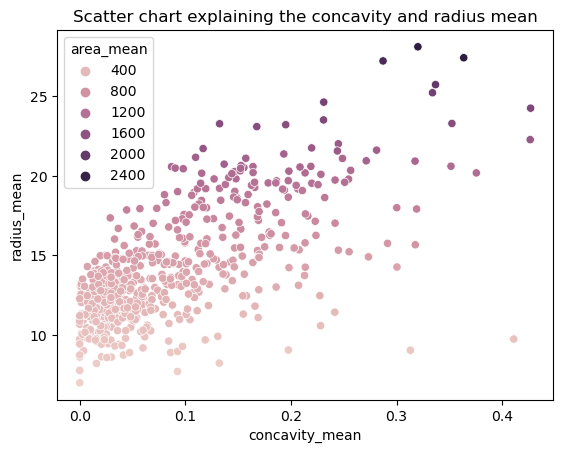

In [128]:
# Scatter chart explaining the concavity and radius mean

sns.scatterplot(x = "concavity_mean", y = "radius_mean", hue = "area_mean",data = cancer_data)
plt.title('Scatter chart explaining the concavity and radius mean')

In [117]:
# Finding unique values to define Categorical vs continious

cancer_data.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

# Data Conculsion 

* All except diagnosis are continous variables

In [118]:
# Finding Data distribution to see if outliers are present or not

cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [119]:
# Label encoder for Categorical column diagnosis

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

cancer_data['diagnosis'] = LE.fit_transform(cancer_data['diagnosis'])
cancer_data['diagnosis'].unique()

array([1, 0])

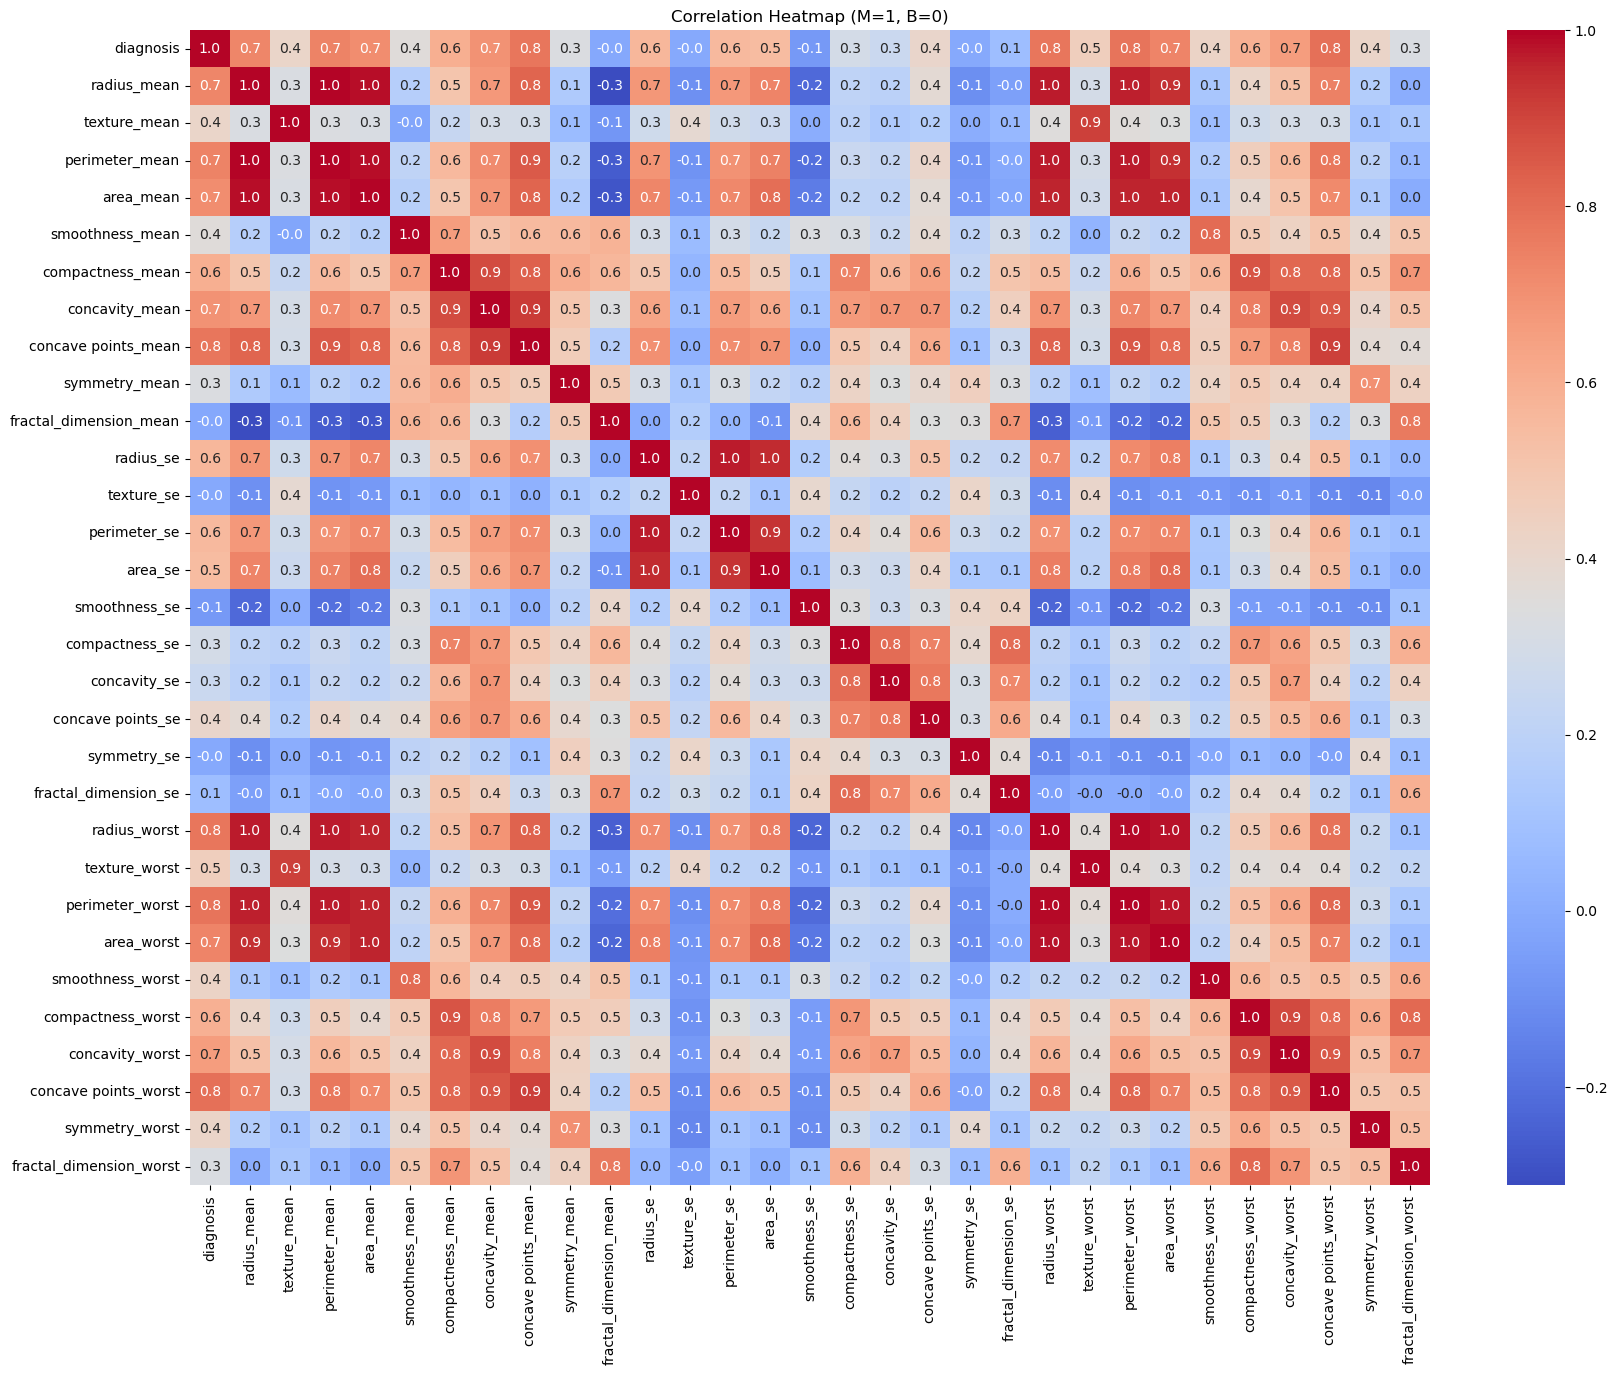

In [120]:
# Encode 'diagnosis' column to numeric values
data_encoded = cancer_data.replace({'diagnosis': {'M': 1, 'B': 0}})

# Compute correlation matrix
correlation_matrix = data_encoded.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap (M=1, B=0)')
plt.show()

In [121]:
# Train test split

from sklearn.model_selection import train_test_split
x=cancer_data.drop('diagnosis',axis=1)
y=cancer_data[['diagnosis']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [122]:
# Implementing the model

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')

# Creating the model on Training Data
LOG=clf.fit(x_train,y_train)
prediction=LOG.predict(x_test)

from sklearn import metrics

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
print('\n Confusion Metrics')
print(metrics.confusion_matrix(prediction, y_test))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('\nAccuracy of the model on Testing Sample Data:', round(F1_Score,))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, x , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
Final_Accuracy = round((round(Accuracy_Values.mean(),2)*100))
print('\nFinal Average Accuracy of the model:', Final_Accuracy,'%')

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


 Confusion Metrics
[[106   3]
 [  2  60]]

Accuracy of the model on Testing Sample Data: 1

Accuracy values for 10-fold Cross Validation:
 [0.98237569 0.89231863 0.91066127 0.94708706 0.96491228 1.
 0.94708706 0.94760977 0.96520848 0.96428571]

Final Average Accuracy of the model: 95 %


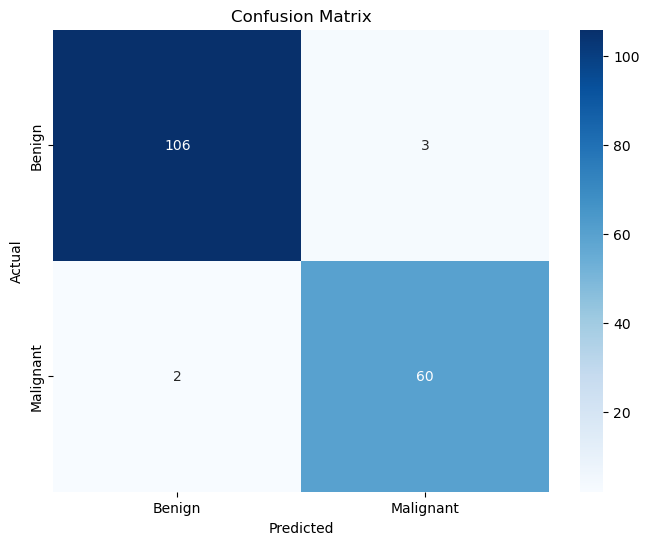

In [125]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(prediction, y_test), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [123]:
aaaaaa

NameError: name 'aaaaaa' is not defined